## 로지스틱 회귀 - sklearn

### 데이터 읽어오기

In [1]:
#import pandas
import pandas as pd # pandas를 pd로 줄여서 사용
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'] # 열 이름 지정 > col_names에 저장 > 리스트 형태로 저장
# load dataset
pima = pd.read_csv("diabetes.csv", names=col_names)  # diabete : 당뇨병, diabetes.csv 파일을 불러와서 pima에 저장
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# label : 1(당뇨), 0(당뇨 X)

In [2]:
pima # pima 데이터 프레임 출력

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree'] # 특성 변수 지정 > feature_cols에 저장 > 리스트 형태로 저장
X = pima[feature_cols] # Features, 특성 변수
y = pima.label # Target variable, 라벨 변수

### 데이터셋 분할(train/test)

In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split # sklearn의 model_selection에서 train_test_split을 불러옴
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) # train_test_split을 이용하여 훈련 데이터와 테스트 데이터로 분리 > X_train, X_test, y_train, y_test에 저장

### 모델 생성 및 학습

In [5]:
# import the class
from sklearn.linear_model import LogisticRegression # sklearn의 linear_model에서 LogisticRegression을 불러옴

# instantiate the model (using the default parameters)
logreg = LogisticRegression() # LogisticRegression을 logreg로 줄여서 사용

# fit the model with data
logreg.fit(X_train,y_train) # 훈련 데이터를 이용하여 모델 훈련 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 모델 평가

In [6]:
## 학습된 모델로 테스트 데이터로 예측 
y_pred=logreg.predict(X_test) # 테스트 데이터를 이용하여 예측 

In [7]:
## 혼동 행령
from sklearn import metrics # sklearn의 metrics를 불러옴
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) # 혼동 행렬을 구함 (실제값, 예측값)
cnf_matrix # 혼동 행렬 출력 

array([[117,  13],
       [ 24,  38]])

In [13]:
import numpy as np # numpy를 np로 줄여서 사용
import matplotlib.pyplot as plt # matplotlib의 pyplot을 plt로 줄여서 사용
import seaborn as sns # seaborn을 sns로 줄여서 사용
# matplotlib을 사용하여 그래프를 출력
%matplotlib inline  


Text(0.5, 23.52222222222222, 'Predicted label')

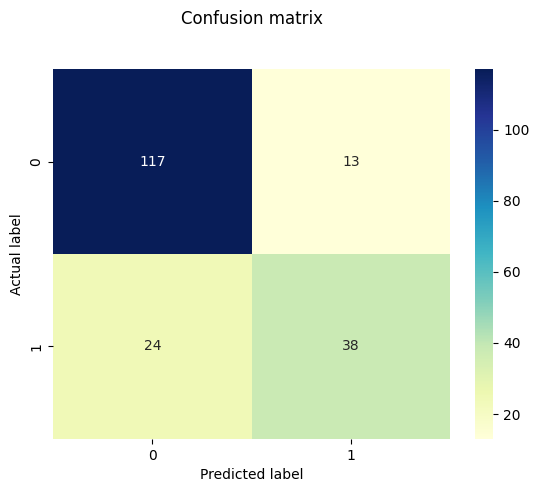

In [14]:
class_names=[0,1] # name  of classes, 클래스 이름 지정
fig, ax = plt.subplots() # plt.subplots() is a function that returns a tuple containing a figure and axes object(s). , 그래프를 그리기 위한 객체 생성
tick_marks = np.arange(len(class_names)) # np.arange() : Return evenly spaced values within a given interval. , 클래스 이름의 길이만큼 배열 생성
plt.xticks(tick_marks, class_names) # x축의 눈금을 클래스 이름으로 지정 > xticks : Get or set the current tick locations and labels of the x-axis.
plt.yticks(tick_marks, class_names) # y축의 눈금을 클래스 이름으로 지정 > yticks : Get or set the current tick locations and labels of the y-axis.
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # heatmap을 그림 , annot : annotate, cmap : color map, fmt : format string
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1) # 그래프의 제목을 지정 , y : y축의 위치를 지정 > 1.1은 그래프의 상단을 의미
plt.ylabel('Actual label') # y축의 이름을 지정 > 실제값
plt.xlabel('Predicted label') # x축의 이름을 지정 > 예측값

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # 정확도 출력 > metrics.accuracy_score(실제값, 예측값)
print("Precision:",metrics.precision_score(y_test, y_pred)) # 정밀도 출력 > metrics.precision_score(실제값, 예측값)
print("Recall:",metrics.recall_score(y_test, y_pred)) # 재현율 출력 > metrics.recall_score(실제값, 예측값)
print("F1 score:",metrics.f1_score(y_test, y_pred)) # F1 점수 출력 > metrics.f1_score(실제값, 예측값)


Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516
F1 score: 0.672566371681416
